In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## An Exploration of UN data

##### In this project, you'll be doing some exploratory analysis on two country-level metrics, gross domestic product (GDP) per capita and overall life expectancy. After completing the guided practice section, you will have a chance to find some additional data and do some more exploring of your own.

### Guided Practice:


#### 1. Download the Gross Domestic Product (GDP) per capita dataset from http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD. Rename it to gdp_per_capita.csv and place it in the data folder of your project repository.

#### 2. Create a Jupyter Notebook in the notebooks folder and name it UN_Data_Exploration.
###### 
You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it
###### .
Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from 'Code' to 'Markdown'. Here is a link to a cheat sheet showing the basics of styling text using Markdown.wn.

#### 3. In the first cell of your notebook, import the required packages with their customary aliases as at the very top of this notebook. ^^^^

#### 4. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. After reading it in, inspect the first 10 rows and then inspect the last 10 rows.

In [9]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [10]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
5,Afghanistan,2018,2902.392113,NaN
6,Afghanistan,2017,2952.998916,NaN
7,Afghanistan,2016,2958.785399,NaN
8,Afghanistan,2015,2967.692067,NaN
9,Afghanistan,2014,3017.942544,NaN


In [11]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
8209,Zimbabwe,1999,4238.195198,NaN
8210,Zimbabwe,1998,4342.858177,NaN
8211,Zimbabwe,1997,4304.406272,NaN
8212,Zimbabwe,1996,4271.479930,NaN
8213,Zimbabwe,1995,3935.280057,NaN
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


#### 5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [13]:
gdp_drop_footnotes = gdp_df.drop('Value Footnotes', axis=1).rename(columns={'Country or Area':'Country', 'Value': 'GDP_Per_Capita'})

#### 6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [15]:
gdp_drop_footnotes.shape

(8219, 3)

In [16]:
gdp_drop_footnotes.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [17]:
gdp_drop_footnotes['Country'] = gdp_drop_footnotes['Country'].astype('string')

In [18]:
gdp_drop_footnotes.dtypes

Country           string[python]
Year                       int64
GDP_Per_Capita           float64
dtype: object

In [19]:
gdp_drop_footnotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         8219 non-null   string 
 1   Year            8219 non-null   int64  
 2   GDP_Per_Capita  8219 non-null   float64
dtypes: float64(1), int64(1), string(1)
memory usage: 192.8 KB


##### 7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?



In [21]:
gdp_drop_footnotes['Year'].value_counts()

Year
2021    247
2020    247
2019    247
2018    247
2017    247
2016    247
2015    247
2014    247
2013    247
2012    246
2022    246
2011    246
2010    245
2009    245
2008    244
2007    242
2006    242
2005    241
2004    241
2003    241
2002    241
2000    240
2023    240
2001    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1993    234
1992    234
1991    234
1990    233
Name: count, dtype: int64

###### I notice that the further in the past the date is the fewer instances of that year are located in the Year column. 

#### 8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [24]:
gdp_drop_footnotes['Country'].nunique()

247

In [25]:
gdp_drop_footnotes['Country'].value_counts().tail(20)

Country
Tunisia                      34
Somalia                      33
Lebanon                      33
Tonga                        33
Syrian Arab Republic         33
Bhutan                       33
Greenland                    32
West Bank and Gaza           30
Serbia                       29
Montenegro                   27
San Marino                   26
CuraÃ§ao                     24
Afghanistan                  24
Virgin Islands               21
Cayman Islands               18
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, dtype: Int64

In [26]:
gdp_drop_footnotes['Country'].value_counts().head(20)

Country
Latvia                        34
East Asia & Pacific           34
Burundi                       34
Bulgaria                      34
Ecuador                       34
Brunei                        34
Africa Western and Central    34
Albania                       34
Algeria                       34
Andorra                       34
Angola                        34
Antigua and Barbuda           34
Arab World                    34
Argentina                     34
Armenia                       34
Aruba                         34
Australia                     34
Austria                       34
Azerbaijan                    34
Bahrain                       34
Name: count, dtype: Int64

###### Perhaps due to these countries being more newly formed, or not having the resources to collect the necessary data, or something of that nature. 

#### 9. Create a new dataframe by subsetting gdp_df to just the year 2021. Call this new dataframe gdp_2021.

In [29]:
gdp_2021 = gdp_drop_footnotes[gdp_drop_footnotes['Year'] == 2021]

In [30]:
gdp_2021

,Country,Year,GDP_Per_Capita
2,Afghanistan,2021,2144.166570
26,Africa Eastern and Southern,2021,3934.287267
60,Africa Western and Central,2021,4698.926894
94,Albania,2021,16113.136519
128,Algeria,2021,14496.865470
...,...,...,...
8067,Virgin Islands,2021,46893.549699
8089,West Bank and Gaza,2021,5663.121607
8119,World,2021,19637.823230
8153,Zambia,2021,3503.034914


#### 10. Use .describe() to find the summary statistics for GDP per capita in 2021.

In [32]:
gdp_2021['GDP_Per_Capita'].describe()

count       247.000000
mean      24478.517262
std       24601.525764
min         836.665571
25%        5996.532844
50%       15900.976581
75%       37298.776853
max      135379.291201
Name: GDP_Per_Capita, dtype: float64

#### 11. Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

<Axes: >

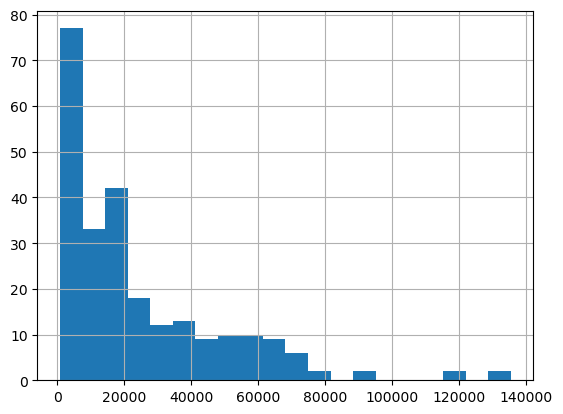

In [34]:
gdp_2021['GDP_Per_Capita'].hist(bins = 20)

In [35]:
gdp_2021['GDP_Per_Capita'].max()

135379.29120102368

#### 12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2021.']

In [37]:
gdp_2021.sort_values('GDP_Per_Capita', ascending=False)

,Country,Year,GDP_Per_Capita
4425,Luxembourg,2021,135379.291201
6513,Singapore,2021,131864.092336
3492,Ireland,2021,118594.746862
6118,Qatar,2021,116832.570290
740,Bermuda,2021,92276.234605
...,...,...,...
5132,Mozambique,2021,1457.235409
6698,Somalia,2021,1392.464262
1733,Dem. Rep. Congo,2021,1313.618218
1301,Central African Republic,2021,1128.552380


#### 13. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2021 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named gdp_pivoted.

In [92]:
gdp_low = gdp_drop_footnotes.loc[gdp_drop_footnotes['Year'] == 1990] # selected only 1990 as the year

In [94]:
# gdp_high

In [89]:
gdp_low

,Country,Year,GDP_Per_Capita
57,Africa Eastern and Southern,1990,3386.854480
91,Africa Western and Central,1990,3299.401375
125,Albania,1990,5327.747458
159,Algeria,1990,11728.545729
193,Andorra,1990,50036.300776
...,...,...,...
8031,Vanuatu,1990,3101.680551
8065,Viet Nam,1990,2467.964601
8150,World,1990,11207.386344
8184,Zambia,1990,2425.111287
